In [2]:
import numpy as np
from numpy.linalg import inv as inverse
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams
import seaborn as sns
import sympy as sy
import prettyplotlib as ppl
import pickle
import itertools

from scipy.optimize import curve_fit

import uncertainties as uc
import uncertainties.unumpy as un

sns.set_style(style='white')
fontsize_labels = 22    # size used in latex document
rcParams['font.family'] = 'serif'
rcParams['font.serif'] = ['Computer Modern Roman']
rcParams['text.usetex'] = True
rcParams['figure.autolayout'] = True
rcParams['font.size'] = fontsize_labels
rcParams['axes.labelsize'] = fontsize_labels
rcParams['xtick.labelsize'] = fontsize_labels
rcParams['ytick.labelsize'] = fontsize_labels
rcParams['legend.fontsize'] = fontsize_labels
rcParams['axes.titlesize'] = fontsize_labels
rcParams['figure.figsize'] = (3*6.2, 3*3.83)  # in inches; width corresponds to \textwidth in latex document (golden ratio)

In [38]:
all_data = np.load("data/data.npy")
E_lep = np.unique(all_data["E_lep"])*2
f = open("data/original/daten_4.lum")
lumidata = f.read()
f.close()
mean_E = []
lumi   = {}
for q in range(7):
    E = float(lumidata.split()[9+q*5])
    mean_E += [E]
    lumi[E] = uc.ufloat(float(lumidata.split()[10+q*5]),float(lumidata.split()[13+q*5]))
    
all_data_sorted = {}
for E in mean_E:
    c_data = (all_data["E_lep"]*2 < (E + 0.5)) * (all_data["E_lep"]*2 > (E - 0.5))
    all_data_sorted[E]= all_data[c_data]
    
E_now = 91.22430
lum_now = lumi[E_now]
data = all_data_sorted[E_now]

In [4]:
print(lumidata)

  mean energy       lumi          +- stat        +- sys         +- all
   88.47939       463.9790       2.902361       3.104100       4.249604    
   89.46793       667.5236       3.521166       4.471900       5.691792    
   90.22266       486.7641       3.033955       3.261500       4.454466    
   91.22430       2246.568       6.603405       15.04780       16.43293    
   91.96648       535.9080       3.265110       3.585300       4.849260    
   92.96465       450.6000       3.027953       3.020000       4.276552    
   93.71712       709.6980       3.819882       4.762000       6.104764    



/usr/lib/python3.4/site-packages/matplotlib/figure.py:1653: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


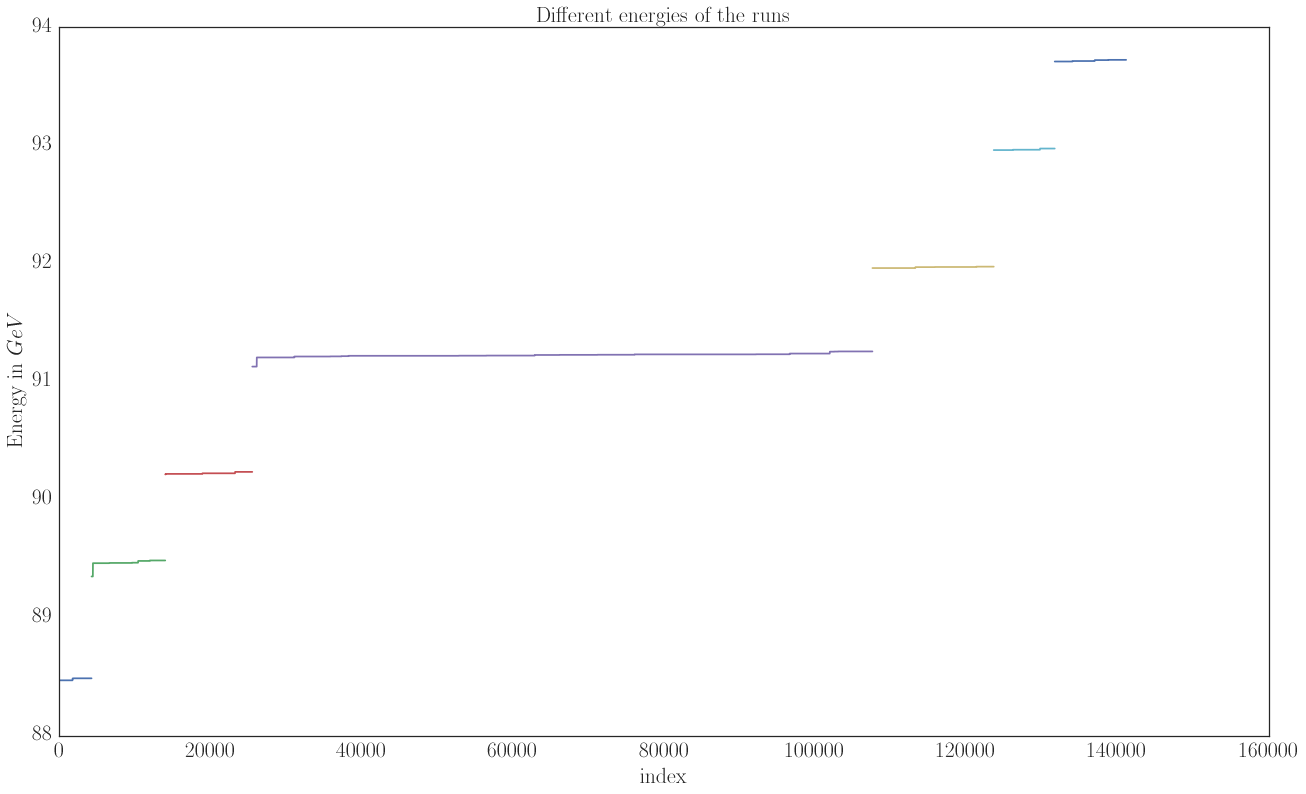

In [5]:
fig, ax = plt.subplots(1,1)
last = 0 
for q in mean_E:
    len_run = len(all_data_sorted[q])
    ax.plot(range(last,last+len_run),2*np.sort((all_data_sorted[q])["E_lep"]))
    last += len_run
ax.set_title("Different energies of the runs")
ax.set_xlabel("index")
ax.set_ylabel("Energy in $GeV$")
plt.show()

/usr/lib/python3.4/site-packages/matplotlib/figure.py:1653: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


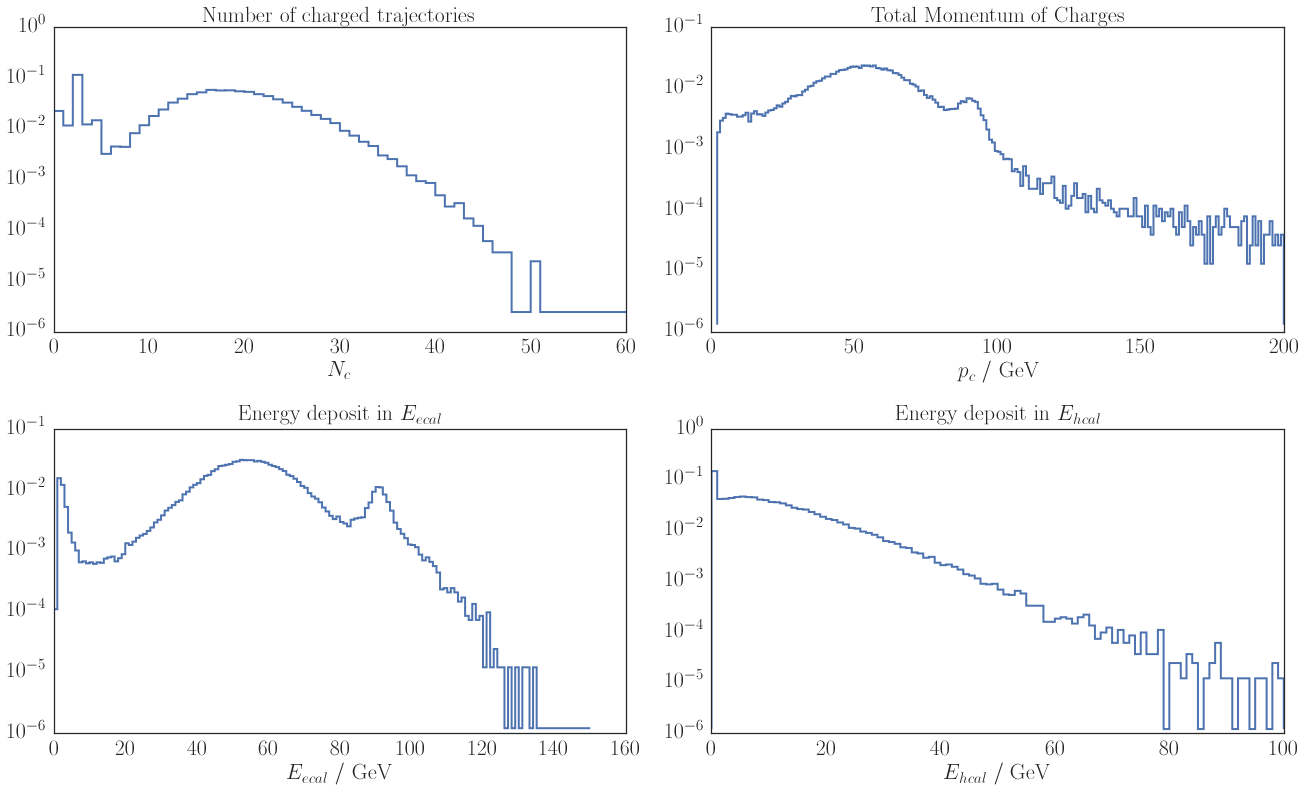

In [6]:
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)

ax1.hist(data["Ncharged"],60,histtype='step',range=(0,60), linewidth=2, log=True, normed = True)
#ax1.hist([r["Ncharged"] for r in ff],50,histtype='bar',range=(0,50))
ax1.set_title("Number of charged trajectories")
ax1.set_xlabel("$N_c$")


ax2.hist(data["Pcharged"],200,range=(2,200),histtype='step', linewidth=2, normed = True, log=True)
#ax2.hist(mm["Pcharged"],100,range=(2,100))
ax2.set_title("Total Momentum of Charges")
ax2.set_xlabel("$p_c$ / GeV")


ax3.hist(data["E_ecal"],150,range=(0,150), histtype='step',linewidth=2, normed = True,log=True)
ax3.set_title("Energy deposit in $E_{ecal}$")
ax3.set_xlabel("$E_{ecal}$ / GeV")


ax4.hist(data["E_hcal"],100,log=True, range=(0,100),histtype='step', linewidth=2, normed = True)
ax4.set_title("Energy deposit in $E_{hcal}$")
ax4.set_xlabel("$E_{hcal}$ / GeV")


plt.show()

/usr/lib/python3.4/site-packages/matplotlib/figure.py:1653: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


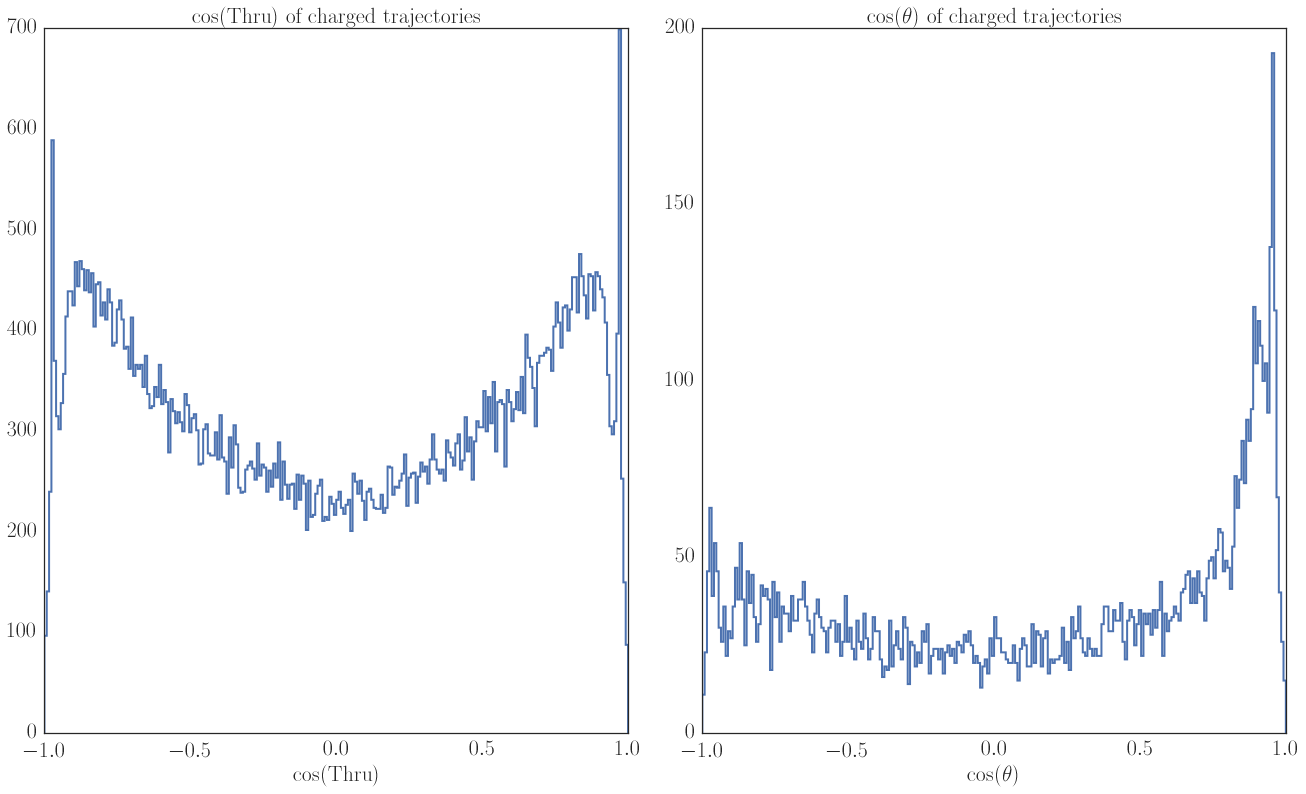

In [7]:
f, (ax1,ax2) = plt.subplots(1, 2)

ax1.hist(data["cos_thru"][data["cos_thru"]!=999],250, histtype="step",linewidth=2)
ax1.set_title("$\\cos(\\mathrm{Thru})$ of charged trajectories")
ax1.set_xlabel("$\\cos(\\mathrm{Thru})$")

ax2.hist(data["cos_thet"][data["cos_thet"]!=999] ,250, histtype="step",linewidth=2)
ax2.set_title("$\\cos(\\theta)$ of charged trajectories")
ax2.set_xlabel("$\\cos(\\theta)$")

plt.show()

/usr/lib/python3.4/site-packages/matplotlib/figure.py:1653: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


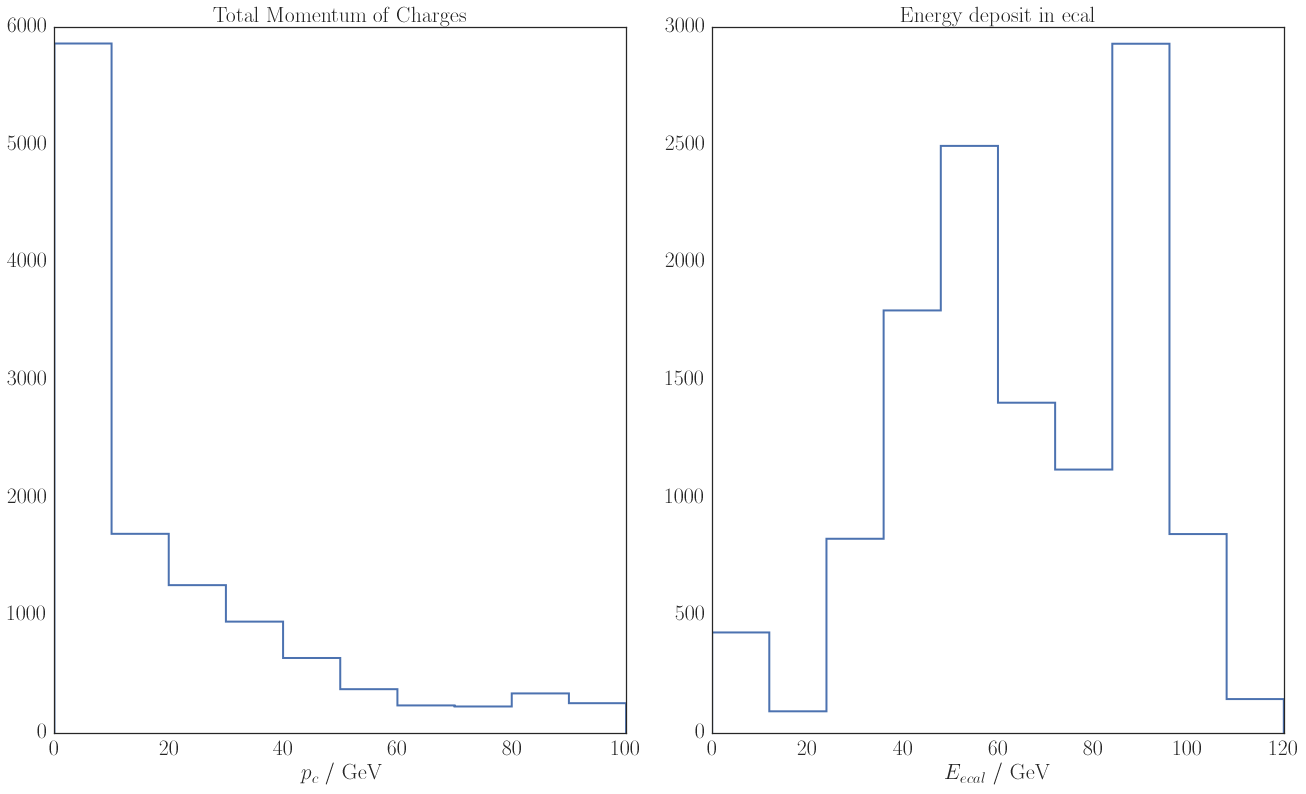

In [8]:
f, (ax1,ax2) = plt.subplots(1, 2)
max_costhru = 0.9
min_costhru = -0.9
ax1.hist(data["Pcharged"][np.logical_or((data["cos_thru"] < min_costhru),(data["cos_thru"] > max_costhru))],range=(0,100), histtype="step",linewidth=2)
ax1.set_title("Total Momentum of Charges")
ax1.set_xlabel("$p_c$ / GeV")

ax2.hist(data["E_ecal"][np.logical_or((data["cos_thru"] < min_costhru),(data["cos_thru"] > max_costhru))] ,range=(0,120), histtype="step",linewidth=2)
ax2.set_title("Energy deposit in ecal")
ax2.set_xlabel("$E_{ecal}$ / GeV")

plt.show()

/usr/lib/python3.4/site-packages/matplotlib/figure.py:1653: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


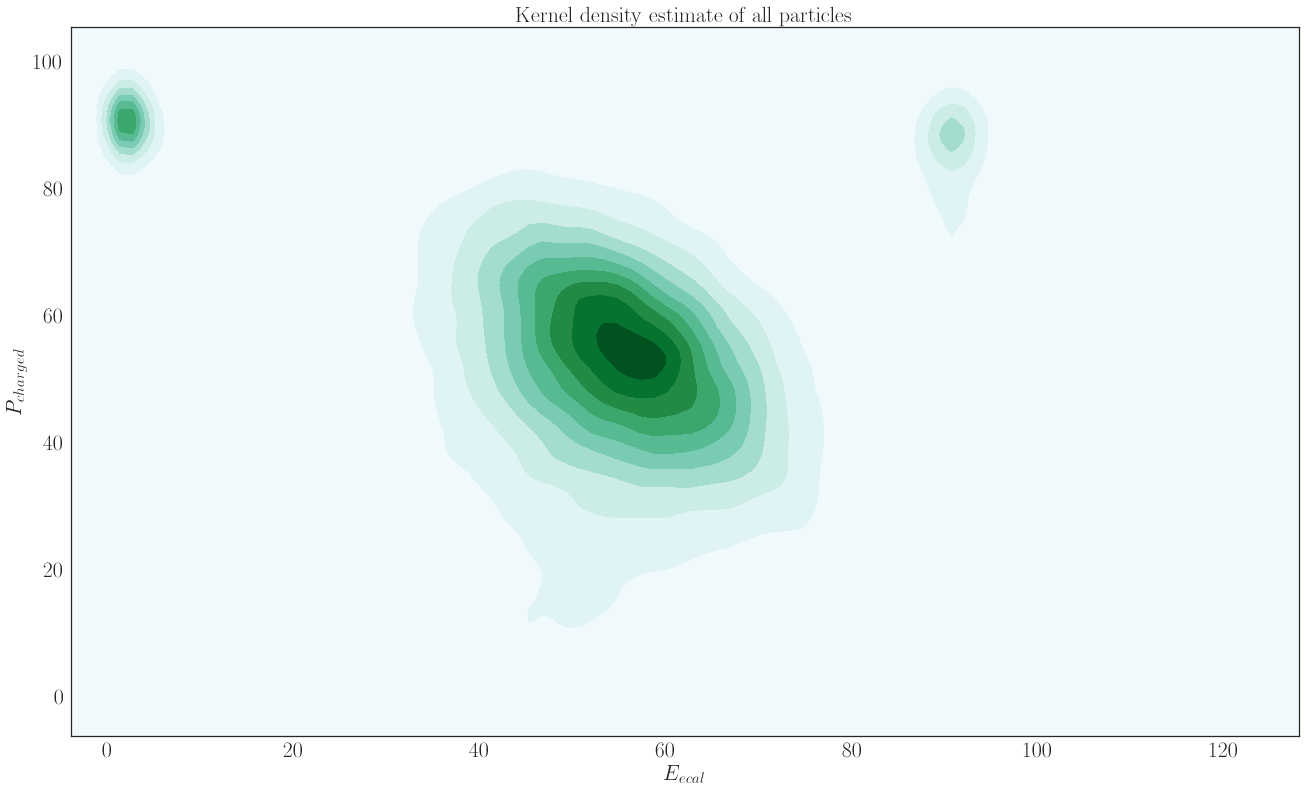

In [9]:
f, ax1 = plt.subplots(1, 1)

ch= (data["Pcharged"] != 0) * (data["Pcharged"] < 100)
sns.kdeplot(data["E_ecal"][ch],data["Pcharged"][ch], shade=True, ax=ax1)
ax1.set_title("Kernel density estimate of all particles")
ax1.set_xlabel("$E_{ecal}$")
ax1.set_ylabel("$P_{charged}$")
plt.show()

# Cuts

In [10]:
# We impose for now that there are no intersections 
C_eff = np.zeros([4,4])
N_all = np.zeros(4)
if 1 == 1:
    u = data
    # Electrons
    c_ee =        (u["E_ecal"]   >= 60)*(u["E_ecal"] <= 120)\
                * np.logical_or((u["Pcharged"] >= 40)*(u["Pcharged"] <= 100),(u["Pcharged"] == 0))\
                * (u["Ncharged"] >= 0)*(u["Ncharged"] <= 10)
    N_all[0] = sum(c_ee)
    print("found %d electrons \t= %.3f %%"%(sum(c_ee),100*sum(c_ee)/len(u)))
    
    rest = np.invert(c_ee)
    
    # Muons 
    c_mm = rest * (u["Pcharged"] >= 0)*(u["Pcharged"] <= 120)\
                * (u["E_ecal"] >= 0)*(u["E_ecal"] <= 60)\
                * (u["Ncharged"] >= 1)*(u["Ncharged"] <= 10) 
    rest = np.invert(c_mm)*rest
    print("found %d muons \t= %.3f %%"%(sum(c_mm),100*sum(c_mm)/len(u)))
    N_all[1] = sum(c_mm)
    
    # Hadrons
    c_qq = rest * (u["Ncharged"] >= 10) \
                * (u["E_ecal"] >= 40)*(u["E_ecal"] <= 80) \
                * (u["Pcharged"] >= 0)*(u["Pcharged"] <= 100)
    rest = np.invert(c_qq)*rest
    print("found %d hadrons \t= %.3f %%"%(sum(c_qq),100*sum(c_qq)/len(u)))
    N_all[3] = sum(c_qq)
    
    # Taons 
    c_tt = rest * (u["Ncharged"] >= 0)*(u["Ncharged"] <= 40) \
                * (u["E_ecal"] >= 0)*(u["E_ecal"] <= 100) \
                * (u["Pcharged"] >= 0)*(u["Pcharged"] <= 100)
    rest = np.invert(c_tt)*rest
    print("found %d tauons \t= %.3f %%"%(sum(c_tt),100*sum(c_tt)/len(u)))
    N_all[2] = sum(c_tt)
    
    
    print("We did not classify %d particles = %.3f%%"%(sum(rest),100*sum(rest)/len(data)))

found 8224 electrons 	= 10.028 %
found 8332 muons 	= 10.160 %
found 56509 hadrons 	= 68.906 %
found 7336 tauons 	= 8.945 %
We did not classify 1608 particles = 1.961%


/usr/lib/python3.4/site-packages/matplotlib/figure.py:1653: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


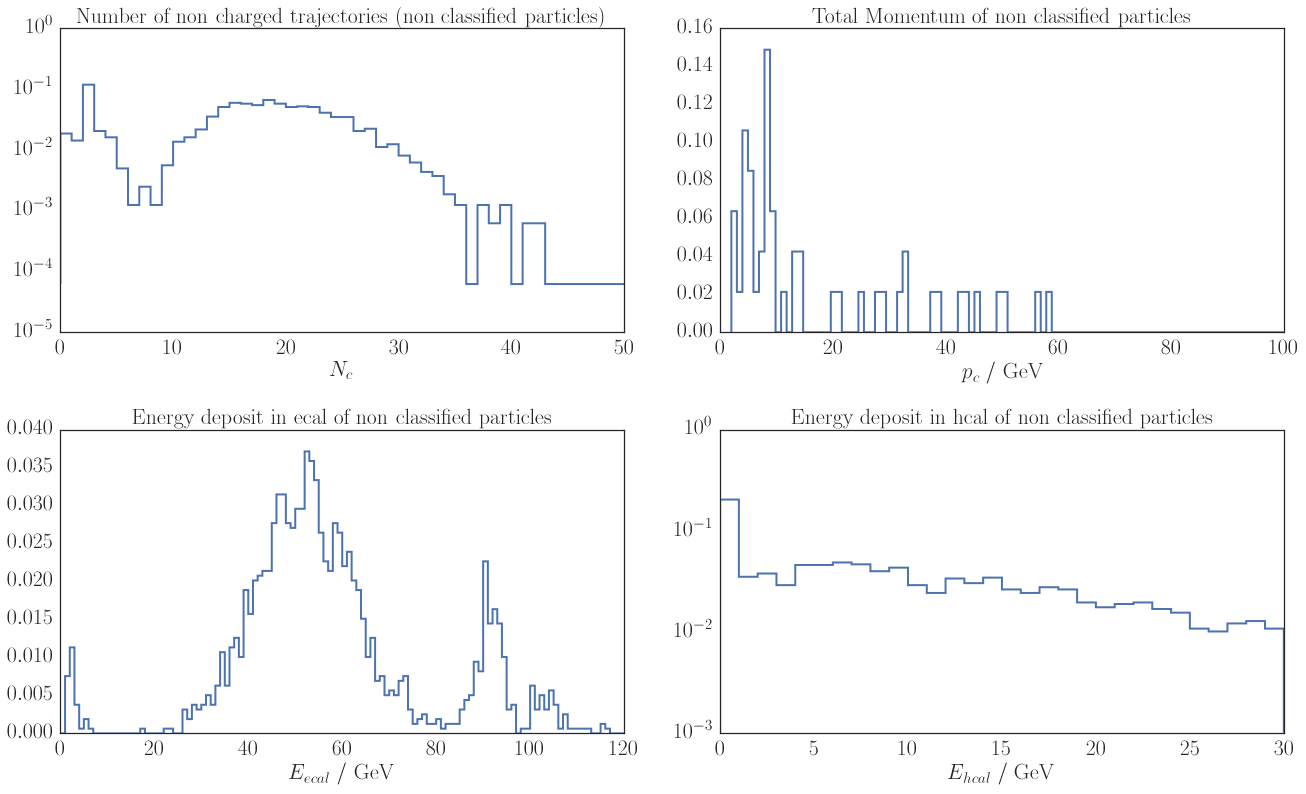

In [11]:
data2 = data[rest]

f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)

ax1.hist(data2["Ncharged"],50,histtype='step',range=(0,50), linewidth=2, log=True, normed = True)
#ax1.hist([r["Ncharged"] for r in ff],50,histtype='bar',range=(0,50))
ax1.set_title("Number of non charged trajectories (non classified particles)")
ax1.set_xlabel("$N_c$")


ax2.hist(data2["Pcharged"],100,range=(2,100),histtype='step', linewidth=2, normed = True)
#ax2.hist(mm["Pcharged"],100,range=(2,100))
ax2.set_title("Total Momentum of non classified particles")
ax2.set_xlabel("$p_c$ / GeV")


ax3.hist(data2["E_ecal"],120,range=(0,120), histtype='step',linewidth=2, normed = True)
ax3.set_title("Energy deposit in ecal of non classified particles")
ax3.set_xlabel("$E_{ecal}$ / GeV")


ax4.hist(data2["E_hcal"],30,log=True, range=(0,30),histtype='step', linewidth=2, normed = True)
ax4.set_title("Energy deposit in hcal of non classified particles")
ax4.set_xlabel("$E_{hcal}$ / GeV")


plt.show()

In [12]:
ff = [data[c_ee],data[c_mm],data[c_tt],data[c_qq]]
chars=["Electrons","Muons","Taons","Hadrons"]

# Cleaning up data

/usr/lib/python3.4/site-packages/matplotlib/figure.py:1653: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


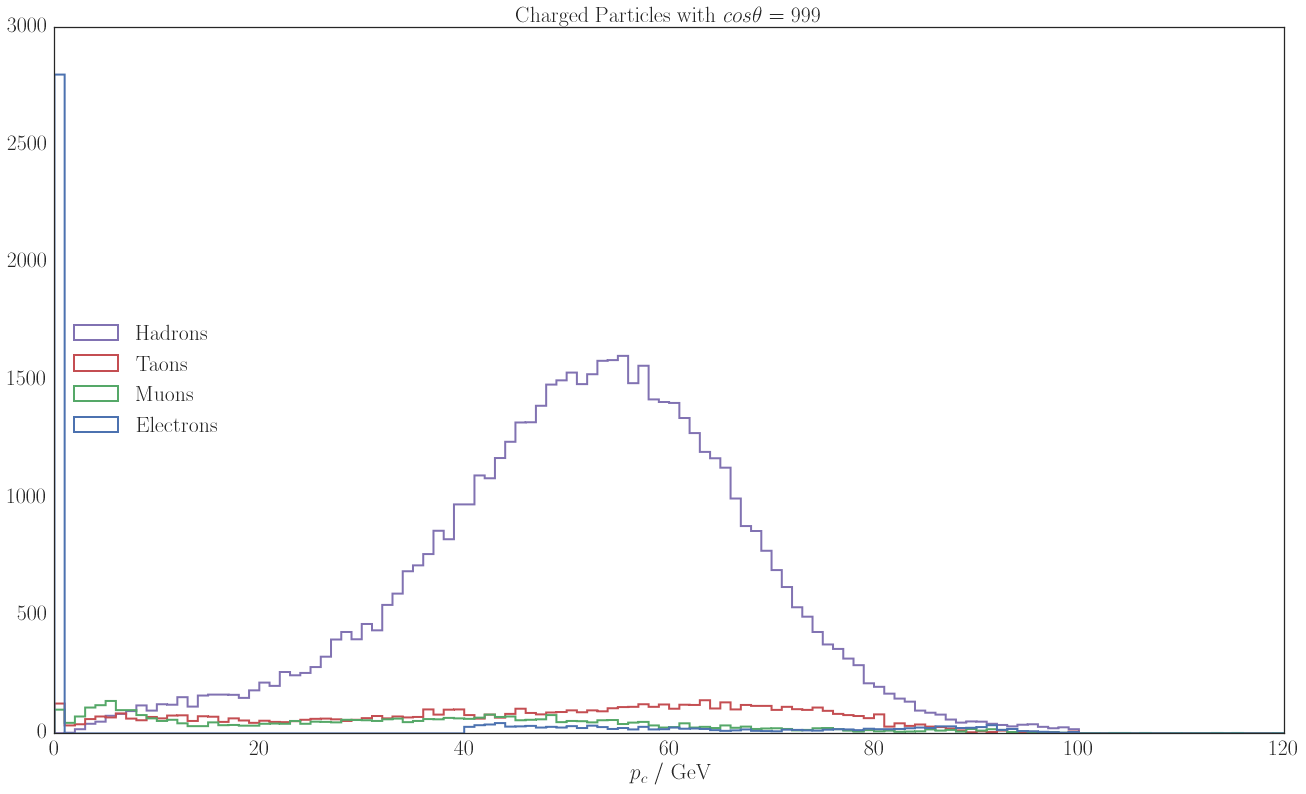

In [13]:
f, ax1 = plt.subplots(1, 1)
   
ax1.hist([u["Pcharged"][u["cos_thet"]>900] for u in ff],120, range=(0,120),label=chars, histtype="step",linewidth=2)
ax1.set_title("Charged Particles with $cos\\theta = 999$")
ax1.set_xlabel("$p_c$ / GeV")
ax1.legend(loc=6)
plt.show()

/usr/lib/python3.4/site-packages/matplotlib/figure.py:1653: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


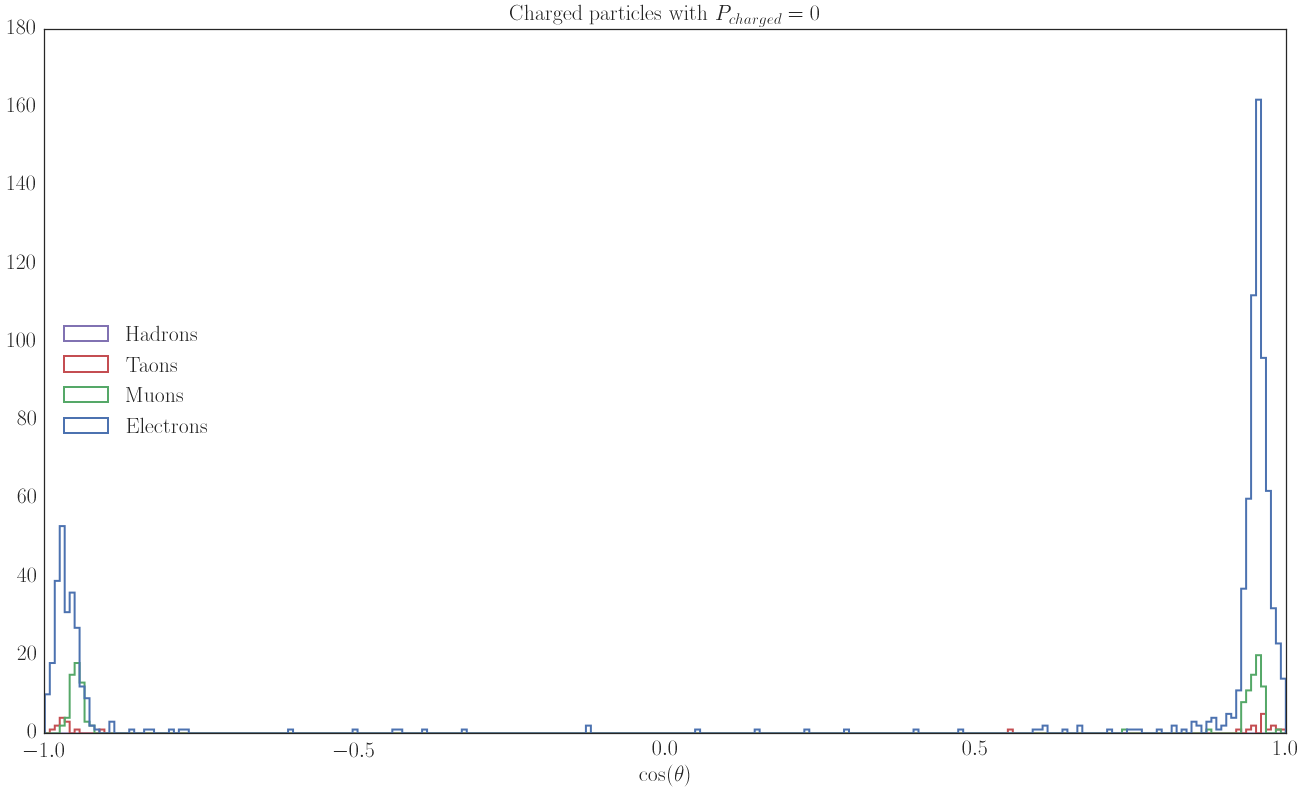

In [14]:
f, ax1 = plt.subplots(1, 1)
   
ax1.hist([u["cos_thet"][(u["Pcharged"]==0)* (u["cos_thet"]<900)] for u in ff],250, label=chars, histtype="step",linewidth=2)
ax1.set_title("Charged particles with $P_{charged}=0$")
ax1.set_xlabel("$\\cos(\\theta)$")
ax1.legend(loc=6)

plt.show()

In [15]:
costhetamin = -0.9
costhetamax = 0.9
ff = [u[(u["Pcharged"]!=0)*np.logical_or((u["cos_thet"]>costhetamin)*(u["cos_thet"]<costhetamax),[ui==3]*len(u))] for ui,u in enumerate(ff)]

# Cut the $s$ and $t$ channel

/usr/lib/python3.4/site-packages/matplotlib/figure.py:1653: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


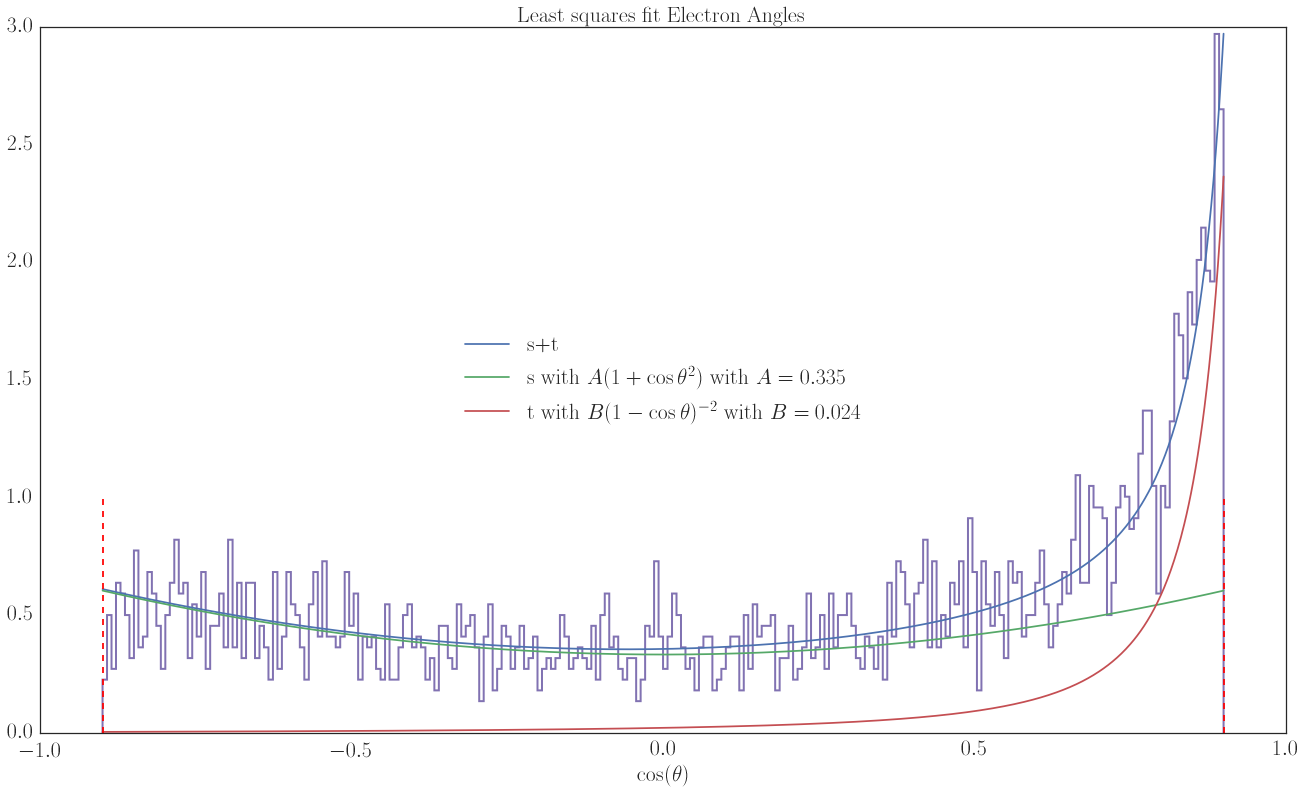

In [35]:
l = np.linspace(0,1,1000)


f, ax1 = plt.subplots(1, 1)

def ts_channel(cos_theta,A,B):
    return A*(1 + cos_theta**2) + B * (1 - cos_theta)**(-2) 

# inital guess
A = 1
B = 1

N_ee, cos_thet = np.histogram(ff[0]["cos_thet"][(ff[0]["cos_thet"]>costhetamin)*(ff[0]["cos_thet"]<costhetamax)],250, density=True)

[A,B], cov = curve_fit(ts_channel, cos_thet[1:], N_ee, p0=[A,B])

cos_thet2 = np.linspace(costhetamin,costhetamax,1000)
plt.plot(cos_thet2, ts_channel(cos_thet2,A,B),label = "s+t")
plt.plot(cos_thet2, A*(1 + cos_thet2**2),label = "s with $A(1 + \\cos\\theta^2)$ with $A=%.3f$"%A)
plt.plot(cos_thet2, B * (1 - cos_thet2)**(-2),label = "t with $B (1 - \\cos\\theta)^{-2}$ with $B=%.3f$"%B)

###
vol_A = np.sum(A*(1 + cos_thet2**2))
vol_B = np.sum(B * (1 - cos_thet2)**(-2))
ratio = vol_A/(vol_A + vol_B)

###
x0 = costhetamin
x1 = costhetamax
al = x1 - x0 + (x1**3 - x0**3)/3
be = 1/(x1-1) - 1/(x0-1)
ratio2 = A*al / (A*al - B*be)

ax1.hist(ff[0]["cos_thet"],250, histtype="step",linewidth=2, range=(costhetamin,costhetamax),normed=True)
ax1.set_title("Least squares fit  Electron Angles")
ax1.set_xlabel("$\\cos(\\theta)$")
ax1.legend(loc=10)

ax1.plot(l*0 + costhetamin ,l, 'r--')
ax1.plot(l*0 + costhetamax ,l, 'r--')

plt.show()

## Scaling the $st$ to $s$

In [37]:
F = lambda x: A*(x+x**3/3)
N_s = A*(F(costhetamax)-F(costhetamin))*len(ff[0])
sigma = ratio2
print("%.3f %% of the electrons are in s channel"%(100*sigma))

77.367 % of the electrons are in s channel


In [41]:
ratio2,ratio

(0.77366938377835504, 0.77224416050877454)

# Difference in cuts with respect to s and t channel?

/usr/lib/python3.4/site-packages/matplotlib/figure.py:1653: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


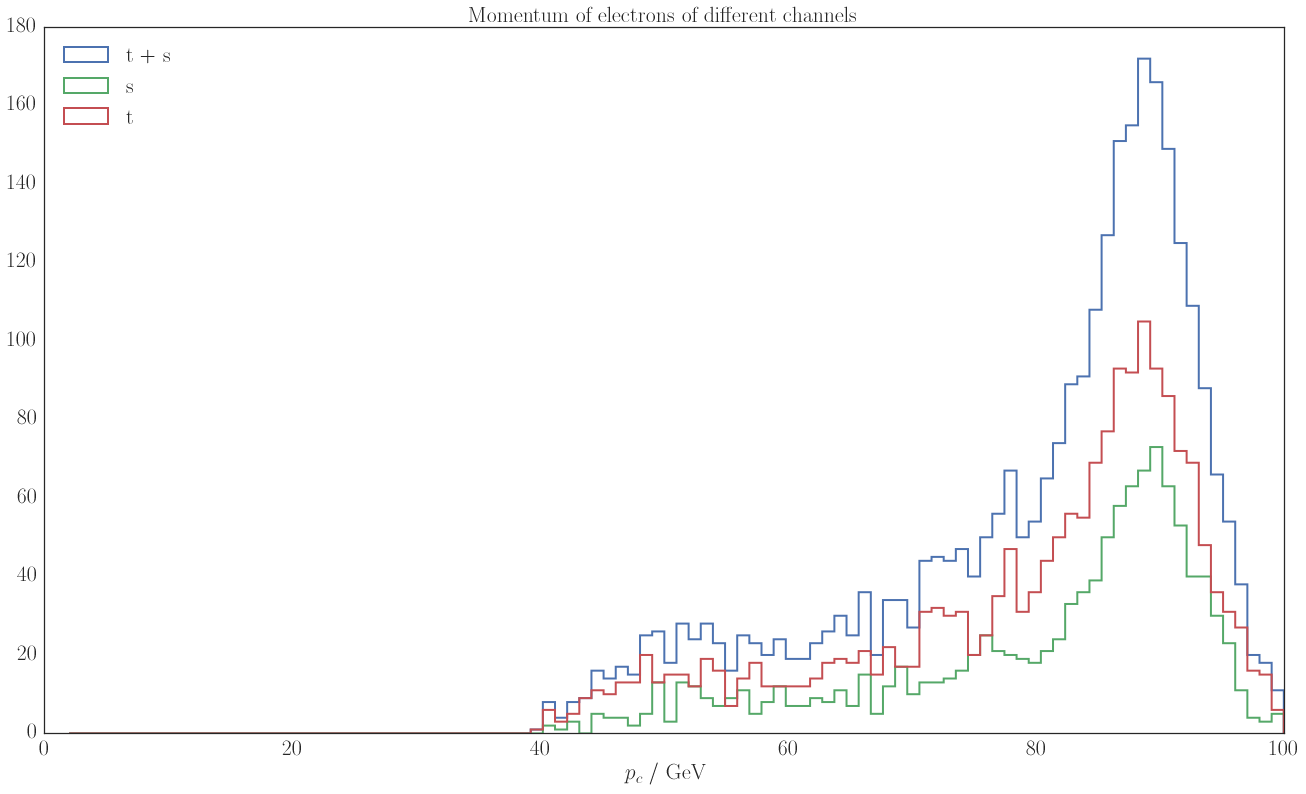

In [18]:
f, ax1 = plt.subplots(1, 1)
var = "Pcharged"
ax1.hist(ff[0][var],100,range=(2,100),histtype='step',label= "t + s", linewidth=2)
ax1.hist(ff[0][var][ff[0]["cos_thet"]< 0 ],100,range=(2,100),histtype='step',label= "s", linewidth=2)
ax1.hist(ff[0][var][ff[0]["cos_thet"]> 0 ],100,range=(2,100),histtype='step',label= "t", linewidth=2)
#ax2.hist(mm["Pcharged"],100,range=(2,100))
ax1.set_title("Momentum of electrons of different channels")
ax1.set_xlabel("$p_c$ / GeV")
ax1.legend(loc=2)

NameError: name 'C_eff_inv' is not defined